In [1]:
import pandas as pd
import numpy as np
np.random.seed(5)

In [2]:
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')

In [4]:
print(train.head())
print(test.head())

            Player Pos   3P   TRB  BLK
0   Victor Oladipo  SG  1.9   4.3  0.3
1    Anthony Davis   C  0.5  11.8  2.2
2      Willie Reed   C  0.0   4.7  0.7
3  Bismack Biyombo   C  0.0   7.0  1.1
4      Zach LaVine  SG  2.6   3.4  0.2
           Player Pos   3P   TRB  BLK
0    Troy Daniels  SG  2.1   1.5  0.1
1        Alex Len   C  0.0   6.6  1.3
2  DeAndre Jordan   C  0.0  13.8  1.7
3   Channing Frye   C  1.9   3.9  0.5
4  Frank Kaminsky   C  1.5   4.5  0.5


In [5]:
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [7]:
print(train.isnull().sum())
print(test.isnull().sum())

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


---
### 최적의 k 찾기 (교차검증-cross validation)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [10]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정
max_k_range = train.shape[0]//2
max_k_range

40

In [13]:
# 최적의 k를 찾기 위해 범위 확인
k_list = []
for i in range(3,max_k_range,2):
    k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [14]:
# 점수 저장 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

In [15]:
# 교차 검증 (10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv=10, # cv:cross validation (교차검증 횟수)
        scoring='accuracy'
    )
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.8625,
 0.875,
 0.875,
 0.85,
 0.825,
 0.825,
 0.825,
 0.825]

In [19]:
# 가장 예측력이 높은 k를 선정
cvs = cross_validation_scores

k_list[cvs.index(max(cross_validation_scores))]


3

In [20]:
import matplotlib.pyplot as plt

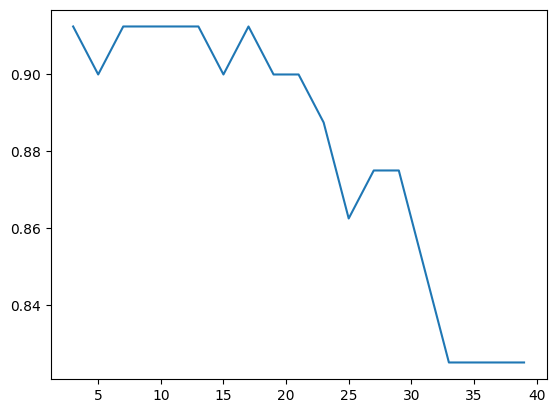

In [21]:
plt.plot(
    k_list,
    cross_validation_scores,
    
)
plt.show()

> k값 결과 도출 완료 (k=3)

---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
x_train = train[['3P','BLK']]
y_train = train['Pos']

In [25]:
x_test = test[['3P','BLK']]
y_test = test['Pos']

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [26]:
knn.score(x_test,y_test)

0.8

In [27]:
pred = knn.predict(x_test)

In [29]:
compare = pd.DataFrame(
    {
        '예측값':pred,
        '정답':y_test
    }
)
compare

,예측값,정답
0,SG,SG
1,C,C
2,C,C
3,SG,C
4,SG,C
5,SG,C
6,C,C
7,SG,SG
8,C,C
9,SG,SG


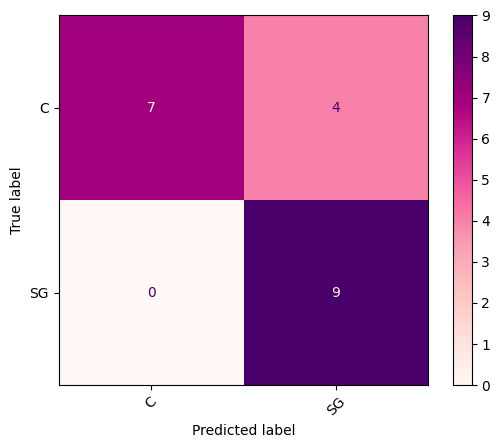

In [30]:
# 2개의 특징으로 예측하기 (3점슛, 블로킹) - Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test,pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [31]:
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']
x_test = test[['3P','BLK','TRB']]
y_test = test['Pos']

In [32]:
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
pred = knn.predict(x_test)
compare = pd.DataFrame(
    {
        '예측값':pred,
        '정답':y_test
    }
)
compare

,예측값,정답
0,SG,SG
1,C,C
2,C,C
3,SG,C
4,SG,C
5,C,C
6,C,C
7,SG,SG
8,SG,C
9,SG,SG


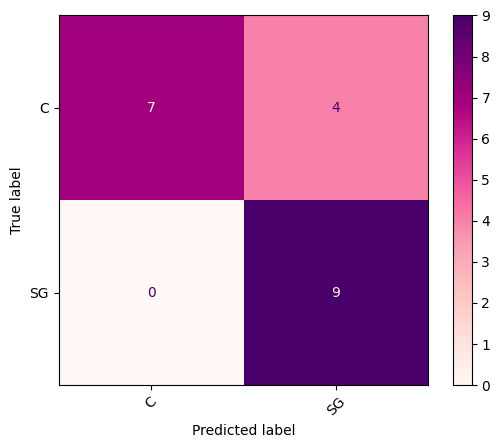

In [33]:
confusion_matrix2 = confusion_matrix(y_test,pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix2,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측 (3점, 블락, 리바)
3P: 3.4, BLK: 0.5, TRB: 3.7

/Users/ethan/.local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


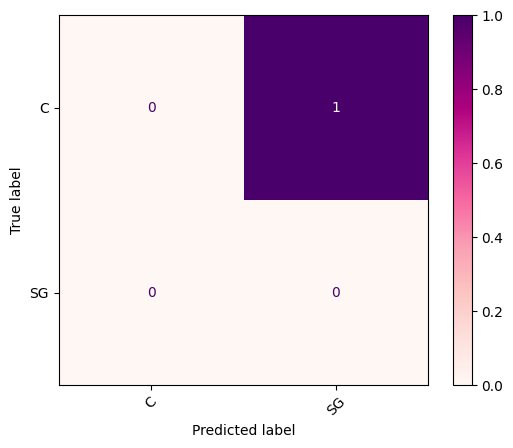

In [40]:
x_test = [[3.4,0.5,3.7]]
y_test = ['Pos']
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
pred = knn.predict(x_test)
compare = pd.DataFrame(
    {
        '예측값':pred,
        '정답':y_test
    }
)
confusion_matrix3 = confusion_matrix(y_test,pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix3,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()